# Packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import pydotplus 
from IPython.display import Image  

plt.style.use('ggplot')

C:\Users\Mateus\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def balance_class(data, predict_class):
    
    qtd0 = len(data.loc[data[predict_class] == 0])
    qtd1 = len(data.loc[data[predict_class] == 1])
    
    menor_classe = 0 
    
    if qtd1 < qtd0:
        menor_classe = 1
        
    adicionar = qtd1-qtd0 if qtd1>qtd0 else qtd0-qtd1
    
    duplicate_entries = data.copy()
    menor_classe_entries = duplicate_entries.loc[duplicate_entries[predict_class]==menor_classe].copy()

    duplicate_entries = duplicate_entries.append(menor_classe_entries.sample(adicionar).copy(),  ignore_index=True)


    return duplicate_entries    

## Variáveis úteis

In [3]:
zscore = "z-score"
minmax = "maxmin"
original = "original"
duplicate = "duplicate"
seed = 1

# Leitura dos Dados

In [4]:
data = {}
data[original]= pd.read_csv("diabetes/diabetes.csv")


In [5]:
data[original].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Colunas de Predição

In [6]:
predictors = [str(x) for x in data["original"].columns[:-1]]
predict_class = str(data[original].columns[-1])

# Tratamento dos Dados

## Normalizando os Dados

In [7]:
data[zscore] = normalize_data(data[original], predictors, zscore)
data[minmax] = normalize_data(data[original], predictors, minmax)

Normalizando Pregnancies com z-score
Normalizando Glucose com z-score
Normalizando BloodPressure com z-score
Normalizando SkinThickness com z-score
Normalizando Insulin com z-score
Normalizando BMI com z-score
Normalizando DiabetesPedigreeFunction com z-score
Normalizando Age com z-score
Normalizando Pregnancies com MaxMin
Normalizando Glucose com MaxMin
Normalizando BloodPressure com MaxMin
Normalizando SkinThickness com MaxMin
Normalizando Insulin com MaxMin
Normalizando BMI com MaxMin
Normalizando DiabetesPedigreeFunction com MaxMin
Normalizando Age com MaxMin


C:\Users\Mateus\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


## Adicionando Entradas para Equilibrio

In [8]:
qtd_diabeticos = len(data[original].loc[data[original][predict_class]==1])
qtd_saudaveis = len(data[original].loc[data[original][predict_class]==0])
qtd_total = len(data[original])

duplicate_entries = data[original].copy()
diabetes = duplicate_entries.loc[duplicate_entries[predict_class]==1].copy()

print len(duplicate_entries)

#duplicate_entries = pd.concat([duplicate_entries, diabetes.sample(qtd_saudaveis-qtd_diabeticos).copy()])

duplicate_entries = balance_class(data[original], predict_class)

print len(duplicate_entries)

data[duplicate] = duplicate_entries

768
1000


In [9]:
d = balance_class(data[original], predict_class)

In [10]:
data[duplicate].reset_index()
print data[duplicate]

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             

## Plot dos dados

In [11]:
from pandas.tools.plotting import scatter_matrix, parallel_coordinates, andrews_curves

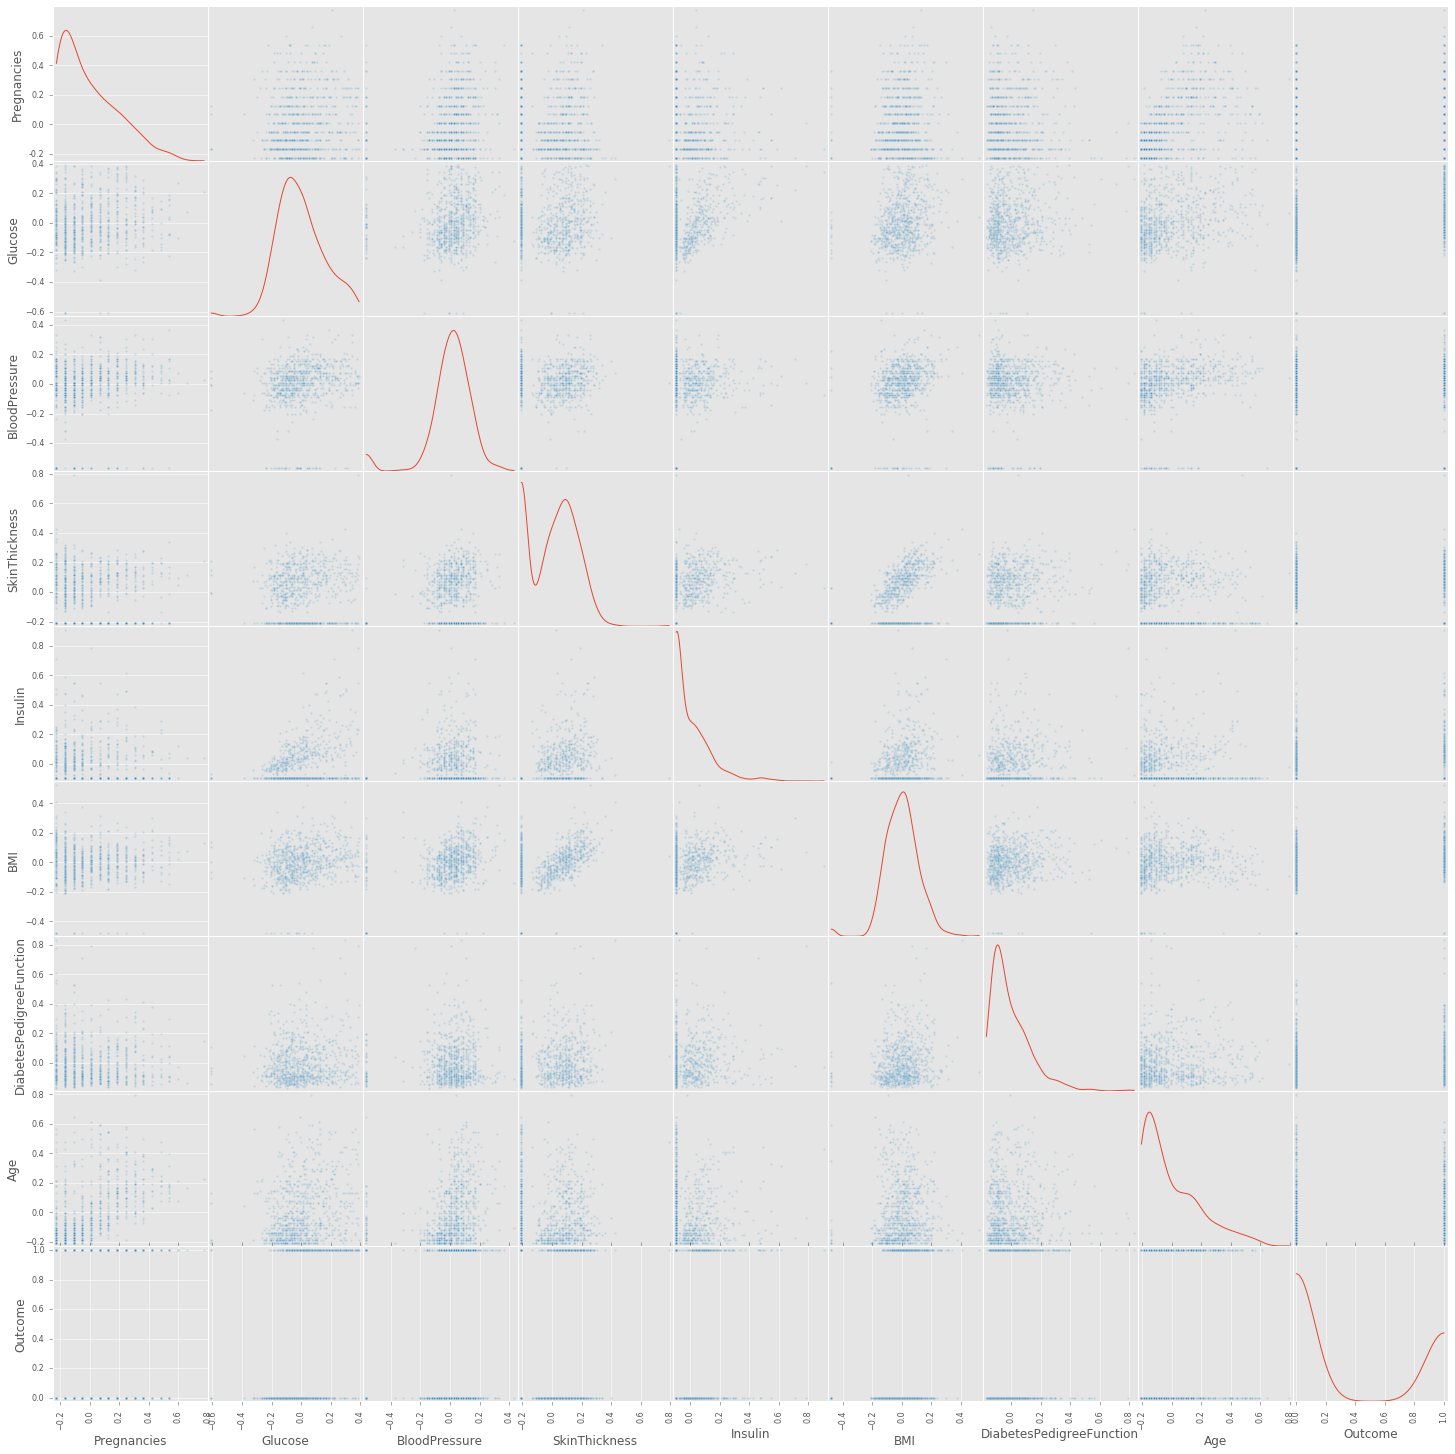

In [12]:
a=scatter_matrix(data[minmax], alpha=0.2, diagonal='kde', figsize=(25,25))

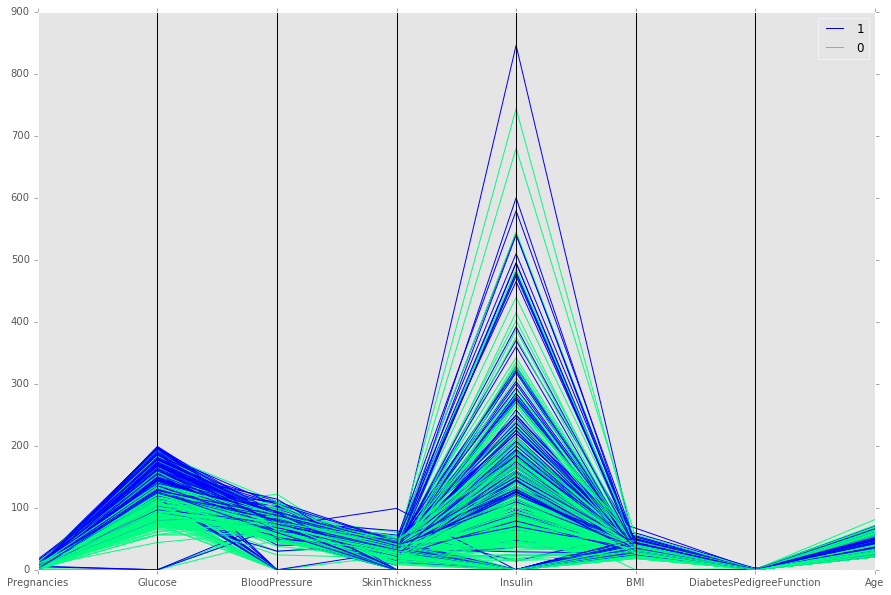

In [13]:
plt.figure(figsize=(15,10))
a=parallel_coordinates(data[original], predict_class, colormap='winter')

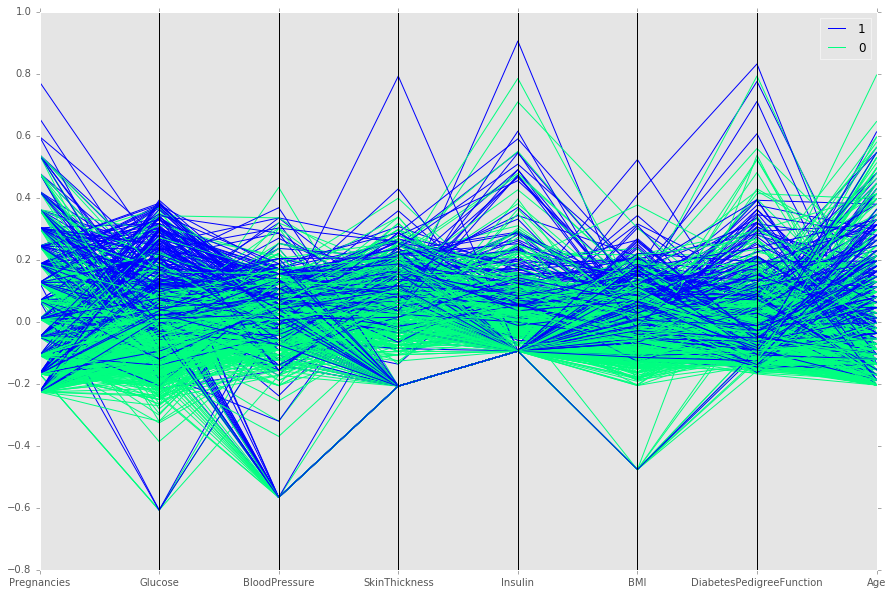

In [14]:
plt.figure(figsize=(15,10))
a=parallel_coordinates(data[minmax], predict_class, colormap='winter')

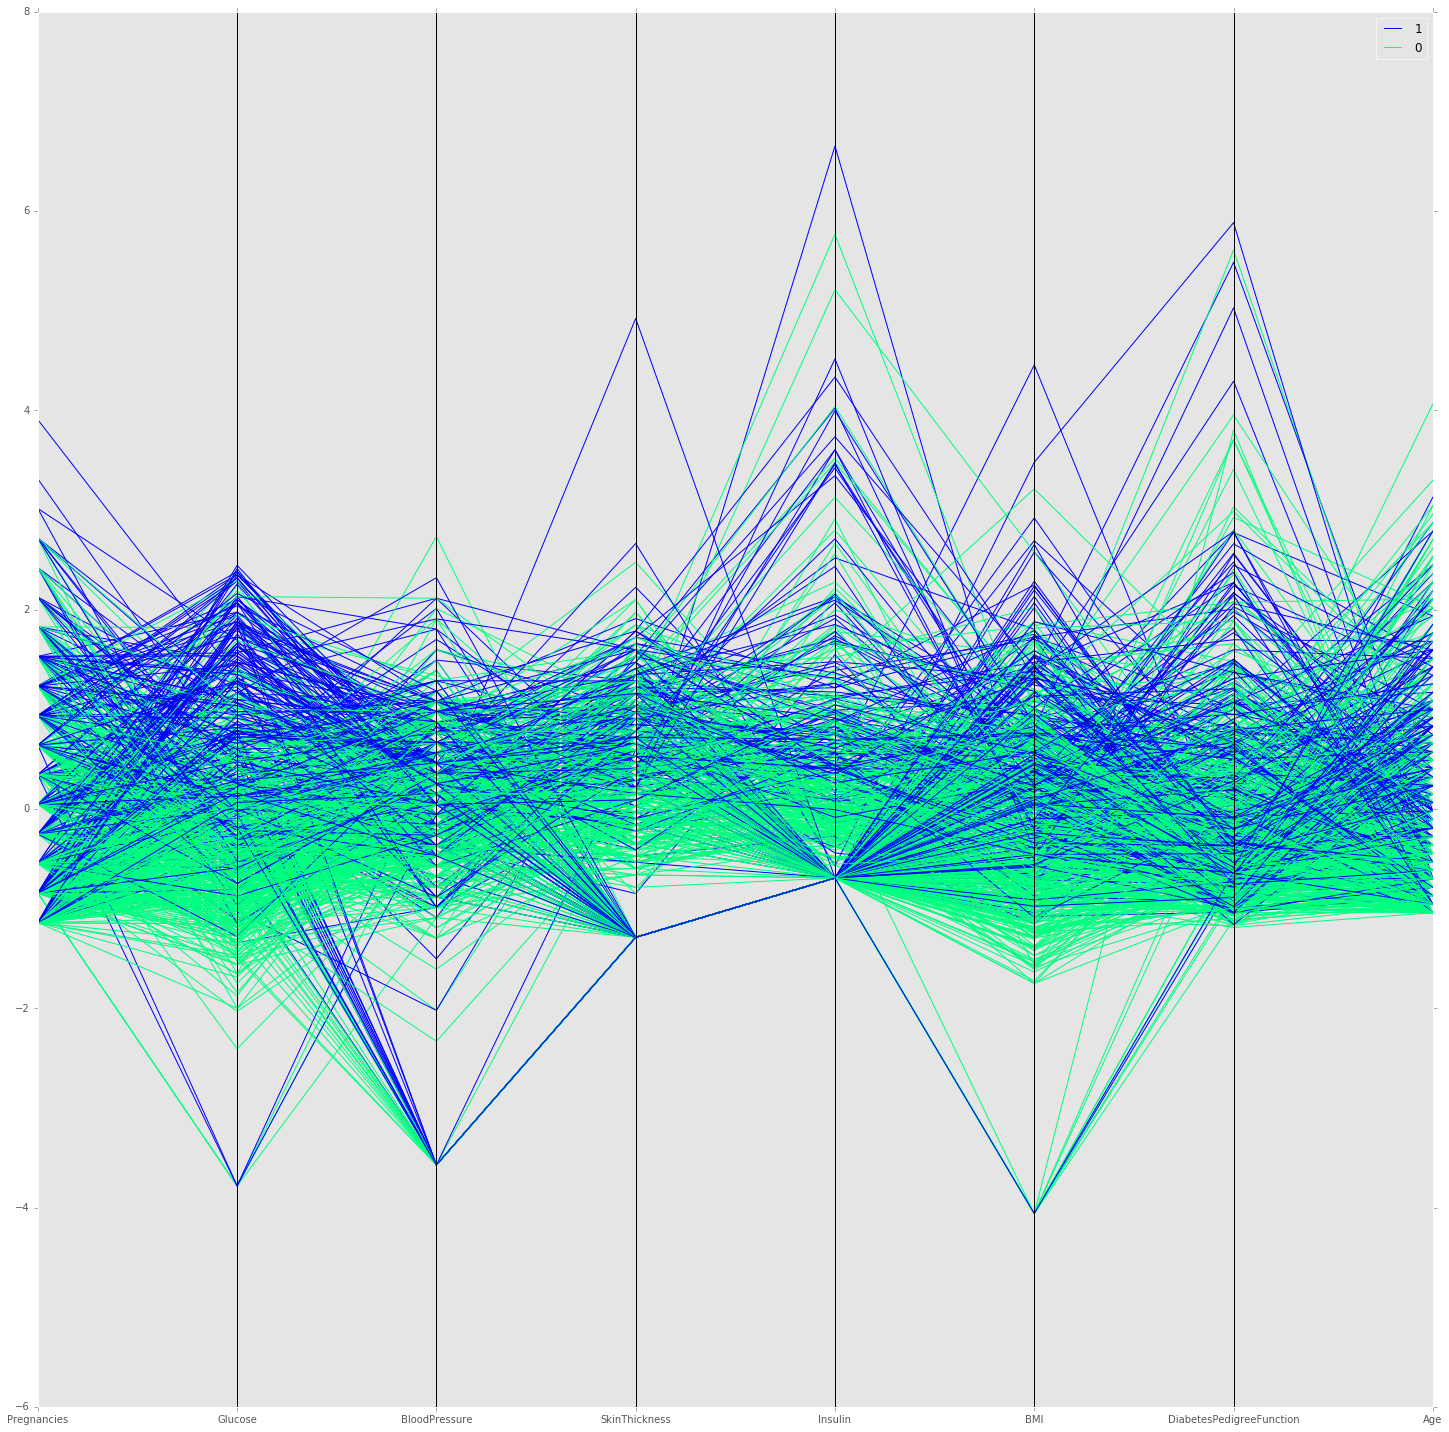

In [15]:
plt.figure(figsize=(25,25))
a=parallel_coordinates(data[zscore], predict_class, colormap='winter')

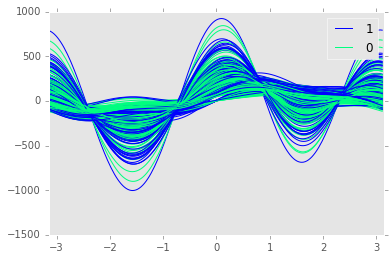

In [16]:
andrews_curves(data[original], predict_class, colormap='winter')

# Classificadores Triviais

## Classificador Constante

In [17]:
qtd_diabeticos = len(data[original].loc[data[original][predict_class]==1])
qtd_saudaveis = len(data[original].loc[data[original][predict_class]==0])
qtd_total = len(data[original])
clas_trivial = float(qtd_saudaveis)/qtd_total
print "Qtd de diabeticos: %d" % qtd_diabeticos
print "Qtd de nao diabeticos: %d" % qtd_saudaveis
print "Classificador trivial: %5.2f %5.2f" % (clas_trivial, 1-clas_trivial)

Qtd de diabeticos: 268
Qtd de nao diabeticos: 500
Classificador trivial:  0.65  0.35


## Classificador Bayes

In [18]:
alg = GaussianNB()
res = test_algorithm(alg, data["original"], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
print "Classificador Naive Bayes Dados Originais: %5.2f" % res[0]
print res[-1].T
res = test_algorithm(alg, data[zscore], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
print "Classificador Naive Bayes Dados z-score:   %5.2f" % res[0]
print res[-1].T
res = test_algorithm(alg, data[minmax], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
print "Classificador Naive Bayes Dados minmax:    %5.2f" % res[0]
print res[-1].T
res = test_algorithm(alg, data[duplicate], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
print "Classificador Naive Bayes Dados Duplicados:    %5.2f" % res[0]
print res[-1].T

Classificador Naive Bayes Dados Originais:  0.76
[[420 108]
 [ 80 160]]
Classificador Naive Bayes Dados z-score:    0.76
[[420 108]
 [ 80 160]]
Classificador Naive Bayes Dados minmax:     0.76
[[420 108]
 [ 80 160]]
Classificador Naive Bayes Dados Duplicados:     0.72
[[385 165]
 [115 335]]


## KNN

In [19]:
accurs = np.zeros(100)
for i in range(1, 101):
    alg = KNeighborsClassifier(n_neighbors=i)
    res = test_algorithm(alg, data[original], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
    accurs[i-1] = res[0]
    if i % 10 == 0:
        print "Confusion Matrix neighbors=%d"%i
        print res[-1].T

Confusion Matrix neighbors=10
[[442 135]
 [ 58 133]]
Confusion Matrix neighbors=20
[[445 130]
 [ 55 138]]
Confusion Matrix neighbors=30
[[447 150]
 [ 53 118]]
Confusion Matrix neighbors=40
[[453 154]
 [ 47 114]]
Confusion Matrix neighbors=50
[[455 163]
 [ 45 105]]
Confusion Matrix neighbors=60
[[458 164]
 [ 42 104]]
Confusion Matrix neighbors=70
[[458 158]
 [ 42 110]]
Confusion Matrix neighbors=80
[[461 160]
 [ 39 108]]
Confusion Matrix neighbors=90
[[465 164]
 [ 35 104]]
Confusion Matrix neighbors=100
[[462 170]
 [ 38  98]]


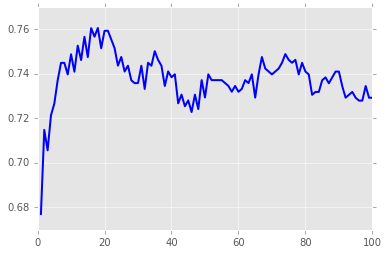

In [20]:
plt.plot(range(1,101), accurs, "-", color="b", linewidth=2.0)

## Random Forest

In [21]:
def pca_acur(data, predictors, predict_class):
    r = []

    for i in range(1, len(predictors) + 1):
        pca = PCA(n_components=i).fit(data[predictors])
        reduced_data = pca.transform(data[predictors]) 
        reduced_data = pd.DataFrame(reduced_data)
        reduced_data[predict_class] = data[predict_class]
        
        aux = traine_with_all_the_data(reduced_data, range(i), predict_class, seed=1)

        r.append(aux)
    
   
    results = {}
    keys = list(r[-1])
    for k in keys:
        results[k] = []
    
    for x in r:
        for k in keys:
            results[k].append(x[k])
    
    for k in keys:
        plt.plot(range(1, len(predictors) + 1), results[k], "o-", label=k)
        

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

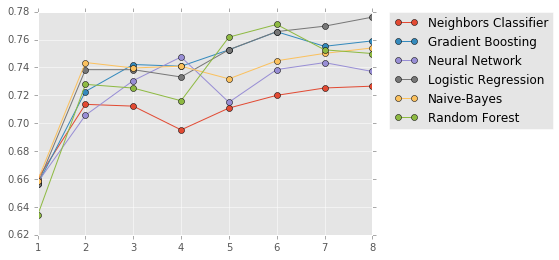

In [22]:
pca_acur(data[original], predictors, predict_class)

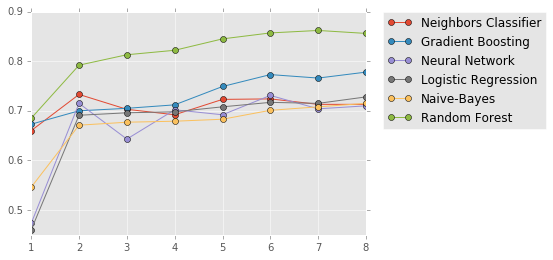

In [23]:
pca_acur(data[duplicate], predictors, predict_class)

In [24]:
for depth in range(2, 11):
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=depth, min_samples_split=2, 
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                                 min_impurity_split=1e-07, class_weight=None, presort=False)
    t = test_algorithm(clf, data["original"], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
    print "depth=%d accuracy=%f" % (depth, t[0])
    
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=depth, min_samples_split=2, 
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                                 min_impurity_split=1e-07, class_weight=None, presort=False)
    
    clf.fit(data["original"][predictors], data["original"][predict_class])
    
    dot_data = export_graphviz(clf, out_file=None, 
                               feature_names=predictors,  
                               class_names=["diabetes", "sadio"], filled=True, rounded=True)  

    graph = pydotplus.graph_from_dot_data(dot_data)  
    graph.write_pdf("arvore_%d_%f.pdf" % (depth, t[0]))
    Image(graph.create_png())    


depth=2 accuracy=0.755109
depth=3 accuracy=0.744651
depth=4 accuracy=0.725188
depth=5 accuracy=0.751282
depth=6 accuracy=0.742139
depth=7 accuracy=0.714815
depth=8 accuracy=0.726538
depth=9 accuracy=0.709604
depth=10 accuracy=0.682211


## SVM Linear

In [25]:
alg = SVC(kernel="linear")
res = test_algorithm(alg, data[original], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
print res[0]
print res[-1].T

0.772129186603
[[440 115]
 [ 60 153]]


In [26]:
alg = SVC(kernel="linear")
res = test_algorithm(alg, data[duplicate], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
print res[0]
print res[-1].T

0.727
[[382 155]
 [118 345]]


## Random Forest

n_estimators=10 accuracy=0.756545
n_estimators=20 accuracy=0.760355
n_estimators=30 accuracy=0.751299
n_estimators=40 accuracy=0.760407
n_estimators=50 accuracy=0.759057
n_estimators=60 accuracy=0.759074
n_estimators=70 accuracy=0.764286
n_estimators=80 accuracy=0.760373
n_estimators=90 accuracy=0.762970
n_estimators=100 accuracy=0.766883
n_estimators=110 accuracy=0.761671
n_estimators=120 accuracy=0.761688
n_estimators=130 accuracy=0.768216
n_estimators=140 accuracy=0.764320
n_estimators=150 accuracy=0.764320
n_estimators=160 accuracy=0.768216
n_estimators=170 accuracy=0.765619
n_estimators=180 accuracy=0.761722
n_estimators=190 accuracy=0.766917
n_estimators=200 accuracy=0.764320


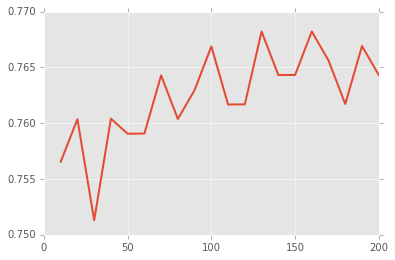

In [27]:
accurs = np.zeros(len(range(10, 201, 10)))
i = 0
for n_estimators in range(10, 201, 10):
    clf = RandomForestClassifier(random_state=1, n_estimators=n_estimators, min_samples_split=4, min_samples_leaf=2)
    
    t = test_algorithm(clf, data[original], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
    
    print "n_estimators=%d accuracy=%f" % (n_estimators, t[0])
    accurs[i] = t[0]
    i += 1
    
plt.plot(range(10, 201, 10), accurs, linewidth=2.0)
    
    

In [28]:
accurs = np.zeros(len(range(10, 201, 10)))
i = 0
for n_estimators in range(10, 201, 10):
    clf = RandomForestClassifier(random_state=1, n_estimators=n_estimators, min_samples_split=4, min_samples_leaf=2)
    
    t = test_algorithm(clf, data[duplicate], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
    
    print "n_estimators=%d accuracy=%f" % (n_estimators, t[0])
    accurs[i] = t[0]
    i += 1
    
plt.plot(range(10, 201, 10), accurs, linewidth=2.0)

n_estimators=10 accuracy=0.820000
n_estimators=20 accuracy=0.841000
n_estimators=30 accuracy=0.836000
n_estimators=40 accuracy=0.845000
n_estimators=50 accuracy=0.852000
n_estimators=60 accuracy=0.857000


KeyboardInterrupt: 

In [33]:
def test_algorithm(alg, train_data, predictors, predict_class, treat_output=None, seed=1, n_folds=10):

    # Initialize our algorithm class

    # Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
    # We set random_state to ensure we get the same splits every time we run
    # this.
    kf = KFold(n_splits=n_folds, random_state=seed)

    predictions = []

    acus = []

    for train, test in kf.split(train_data):
        # The predictors we're using the train the algorithm.  Note how we only
        # take the rows in the train folds.
        balanced = balance_class(train_data.iloc[train, :], predict_class)
        train_predictors = (balanced[predictors])
        # The target we're using to train the algorithm.
        train_target = balanced[predict_class].astype(float)

        # Training the algorithm using the predictors and target.
        #alg = alg.fit(train_predictors, train_target)
        alg.fit(train_predictors, train_target)
        # We can now make predictions on the test fold
        test_predictions = alg.predict(train_data[predictors].iloc[test, :])

        if treat_output:
            test_predictions = treat_output(test_predictions)

        predictions.append(test_predictions)

        acus.append(accuracy_score(test_predictions, np.array(
            train_data[predict_class].iloc[test].astype(float))))

    predictions = np.concatenate(predictions, axis=0)

    confusion = confusion_matrix(np.array(
        train_data[predict_class].astype(int)), predictions, sample_weight=None)

    return sum(acus) / len(acus), acus, predictions, confusion

n_estimators=10 accuracy=0.759074
[[394  79]
 [106 189]]
n_estimators=20 accuracy=0.750000
[[396  88]
 [104 180]]
n_estimators=30 accuracy=0.747351
[[396  90]
 [104 178]]
n_estimators=40 accuracy=0.766849
[[400  79]
 [100 189]]
n_estimators=50 accuracy=0.761688
[[398  81]
 [102 187]]
n_estimators=60 accuracy=0.760407
[[398  82]
 [102 186]]
n_estimators=70 accuracy=0.760424
[[401  85]
 [ 99 183]]
n_estimators=80 accuracy=0.760441
[[400  84]
 [100 184]]
n_estimators=90 accuracy=0.760424
[[398  82]
 [102 186]]
n_estimators=100 accuracy=0.759091
[[401  86]
 [ 99 182]]
n_estimators=110 accuracy=0.764354
[[402  83]
 [ 98 185]]
n_estimators=120 accuracy=0.760407
[[398  82]
 [102 186]]
n_estimators=130 accuracy=0.757690
[[399  85]
 [101 183]]
n_estimators=140 accuracy=0.757775
[[395  81]
 [105 187]]
n_estimators=150 accuracy=0.751316
[[393  84]
 [107 184]]
n_estimators=160 accuracy=0.756425
[[399  86]
 [101 182]]
n_estimators=170 accuracy=0.764252
[[402  83]
 [ 98 185]]
n_estimators=180 accura

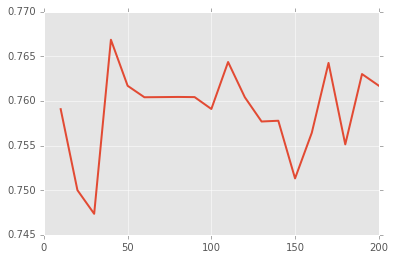

In [30]:
accurs = np.zeros(len(range(10, 201, 10)))
i = 0
for n_estimators in range(10, 201, 10):
    clf = RandomForestClassifier(random_state=1, n_estimators=n_estimators, min_samples_split=4, min_samples_leaf=2)
    
    t = test_algorithm(clf, data[original], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
    
    print "n_estimators=%d accuracy=%f" % (n_estimators, t[0])
    print t[-1].T
    accurs[i] = t[0]
    i += 1
    
plt.plot(range(10, 201, 10), accurs, linewidth=2.0)

In [ ]:
from sklearn.grid_search import GridSearchCV

clf = SVC(kernel="linear")

# prepare a range of values to test
param_grid = [
  {'C': [.01, .1, 1, 10, 100], 'kernel': ['linear']},
 ]

grid = GridSearchCV(estimator=clf, param_grid=param_grid, verbose=True)
grid.fit(data[original][predictors], data[original][predict_class])
print(grid)

In [ ]:
print(grid.best_params_)

In [ ]:
alg_svm_poly_2 = SVC(kernel="poly", C=0.1, coef0=2)
res = test_algorithm(alg_svm_poly_2, data["original"], predictors, predict_class, treat_output=None, seed=1, n_folds=10)

In [ ]:
alg_svm = SVC(kernel="linear", C=0.1)
res = test_algorithm(alg_svm, data["original"], predictors, predict_class, treat_output=None, seed=1, n_folds=10)

In [ ]:
alg_rbf = SVC(kernel="rbf")
res = test_algorithm(alg_svm_poly_2, data["original"], predictors, predict_class, treat_output=None, seed=1, n_folds=10)

In [ ]:
alg_svm_poly_3 = SVC(kernel="poly", C=0.1, coef0=3)
res = test_algorithm(alg_svm_poly_3, data["original"], predictors, predict_class, treat_output=None, seed=1, n_folds=10)

In [ ]:
print res[0]

## Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
for i in range(1,101,10):
    print "Treinando com n_estimators = %d" % i
    bagging = SVC(kernel="linear", C=0.1)
    BaggingClassifier(base_estimator=bagging, n_estimators=i, max_samples=1.0, max_features=1.0, 
                      bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
    r = test_algorithm(bagging, data["original"], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
    print "%d -> %f" % (i, r[0])

In [ ]:
from sklearn.ensemble import BaggingClassifier
for i in range(1,101,10):
    print "Treinando com n_estimators = %d" % i
    bagging = LogisticRegression(random_state=seed)
    BaggingClassifier(base_estimator=bagging, n_estimators=i, max_samples=1.0, max_features=1.0, 
                      bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
    r = test_algorithm(bagging, data[zscore], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
    print "%d -> %f" % (i, r[0])

In [61]:
class ConstantClassifier:
    
    def __init__(self, answer):
        self.answer=answer
    
    def fit(self,x,y):
        return
    
    def predict(self, X):
        return [self.answer]*len(X)

In [64]:
class MultiRegionClassifier:

    def __init__(self, alg, n_regions, random_state = 1):

        self.n_regions = n_regions
        self.kmeans_estimator = None
        self.random_state = random_state
        self.algs = []

        for i in range(n_regions):
            self.algs.append(clone(alg))

    def fit(self, X, Y):
        
        df_X = pd.DataFrame(X)
        df_Y = pd.DataFrame(Y)

        self.kmeans_estimator = KMeans(n_clusters=self.n_regions, random_state=self.random_state)

        self.kmeans_estimator.fit(X)

        clusters = self.kmeans_estimator.predict(X)

        dict_clusters = [[] for x in range(self.n_regions)]

        df_X["clusters___"] = clusters
        df_Y["clusters___"] = clusters

        
        for i in range(self.n_regions):
            Xi = X.loc[X["clusters___"] == i]
            Yi = df_Y.loc[df_Y["clusters___"] == i]

            if(len(Yi["clusters___"] .unique()) == 1):
                self.algs[i] = ConstantClassifier(Yi["clusters___"] .unique()[0])
            else:
                print Yi            
                pred_X =Xi.columns[:-1]
                pred_Y = Yi.columns[:-1]

                self.algs[i].fit(Xi[pred_X], Yi[pred_Y].astype(int))

        return self

        
    def predict(self, X):
        df_X = pd.DataFrame(X)


        clusters = self.kmeans_estimator.predict(df_X)
 
        y = []

        for i in range(len(X)):
            y.append(self.algs[clusters[i]].predict([df_X.iloc[i]])[0])

        return y

In [67]:
for i in range(1,21):
    alg = SVC(kernel="linear")
    clf = MultiRegionClassifier(alg, i)
    r = test_algorithm(clf, data["original"], predictors, predict_class, treat_output=None, seed=1, n_folds=10)
    print "Acuracia %d %f" % (i, r[0])

Acuracia 1 0.651025
Acuracia 2 0.615772
Acuracia 3 0.525889
Acuracia 4 0.377529
Acuracia 5 0.228999
Acuracia 6 0.234142
Acuracia 7 0.222437
Acuracia 8 0.132843
Acuracia 9 0.143455
Acuracia 10 0.158749
Acuracia 11 0.093575
Acuracia 12 0.106869
Acuracia 13 0.088448
Acuracia 14 0.104050
Acuracia 15 0.105451
Acuracia 16 0.100137
Acuracia 17 0.084484
Acuracia 18 0.080537
Acuracia 19 0.076743
Acuracia 20 0.054699


In [ ]:
data[original].loc[data[original].Outcome == 1]["Outcome"].unique()[0]
